E-Commerce Clothing Review Classification
DataSet :  · Women's E-Commerce Clothing Reviews

In [96]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
string.punctuation

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [97]:
import nltk

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

Data collection: 

In [98]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [100]:
df.head(5)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [77]:
print(df.shape)

(23486, 11)


Data preprocessing: Explore the dataset to check for any missing or null values. Remove the columns that are not useful for the analysis, such as "Unnamed: 0", "Clothing ID", "Title", and "Positive Feedback Count". Convert the "Review Text" column to lowercase and remove any special characters or stop words.

In [101]:
# count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [103]:
#This will convert the "Review Text" column to lowercase and remove any special characters.
df['Review Text'] = df['Review Text'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)

In [104]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,i love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


This will remove the columns that are not useful for the analysis

In [105]:
df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Title', 'Positive Feedback Count'], inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              23486 non-null  int64 
 1   Review Text      22641 non-null  object
 2   Rating           23486 non-null  int64 
 3   Recommended IND  23486 non-null  int64 
 4   Division Name    23472 non-null  object
 5   Department Name  23472 non-null  object
 6   Class Name       23472 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.3+ MB


In [107]:
df.isnull().sum()

Age                  0
Review Text        845
Rating               0
Recommended IND      0
Division Name       14
Department Name     14
Class Name          14
dtype: int64

In [108]:
df.dropna(inplace=True)

In [109]:
df.isnull().sum()

Age                0
Review Text        0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64

In [111]:
print(df.shape)

(22628, 7)


Data visualization: Explore the dataset by creating visualizations to gain insights into the data. 

Text(0, 0.5, 'Count')

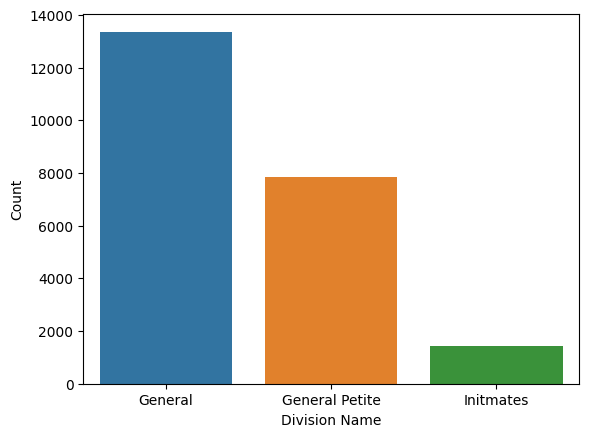

In [112]:
counts = df['Division Name'].value_counts()
counts.sort_index(inplace=True)
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Division Name')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

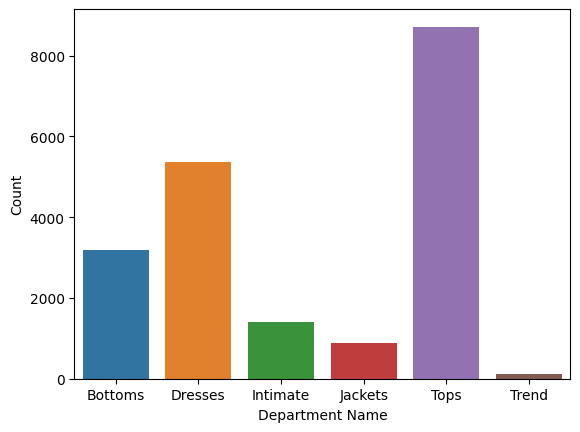

In [82]:
counts = df['Department Name'].value_counts()
counts.sort_index(inplace=True)
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Department Name')
plt.ylabel('Count')

In [113]:
df['Review Text'][2]

'i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c'

In [114]:
df['length']=df['Review Text'].apply(len)
df.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,length
0,33,absolutely wonderful silky and sexy and comfo...,4,1,Initmates,Intimate,Intimates,52
1,34,love this dress its sooo pretty i happened t...,5,1,General,Dresses,Dresses,290
2,60,i had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,486
3,50,i love love love this jumpsuit its fun flirty ...,5,1,General Petite,Bottoms,Pants,115
4,47,this shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,187


<Axes: ylabel='Frequency'>

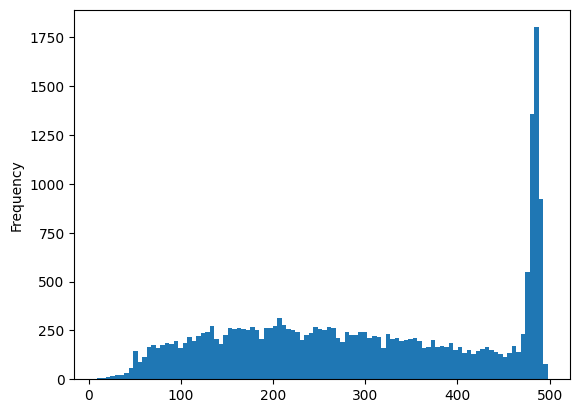

In [115]:
df['length'].plot(bins=100, kind='hist')

In [10]:
df.length.describe()

count    19662.000000
mean       318.444817
std        142.268450
min          9.000000
25%        199.000000
50%        315.000000
75%        475.000000
max        508.000000
Name: length, dtype: float64

In [87]:
df[df['length']==9]['Review Text']


7785    Great fit
Name: Review Text, dtype: object

In [86]:

df[df['length']==508]['Review Text']


17597    I adore this blouse. the colors are vibrant (s...
19304    I have been continually disappointed in retail...
Name: Review Text, dtype: object

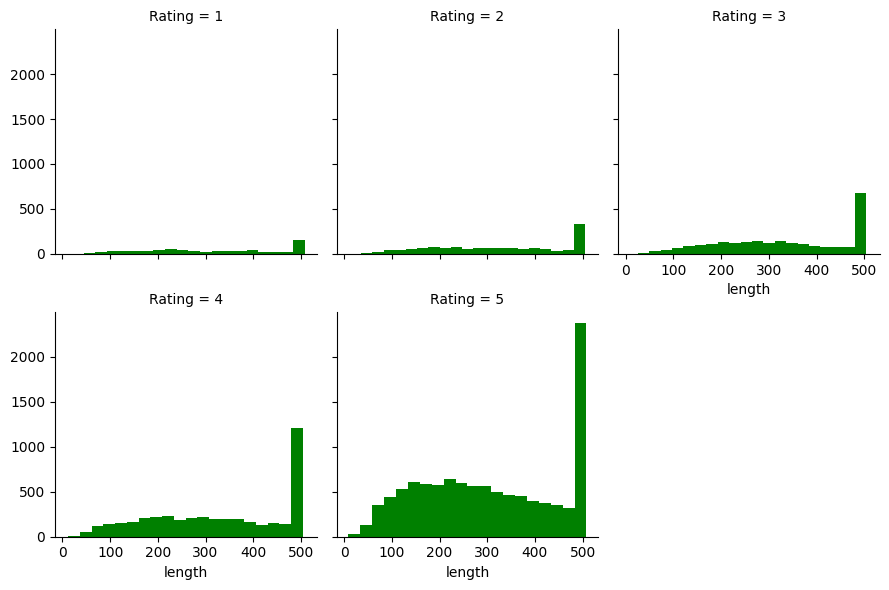

In [88]:
g_ = sns.FacetGrid(data=df, col='Rating', col_wrap=3)
g_.map(plt.hist, 'length', bins=20, color='g')

Remove Punctuation And Remove stopwords¶


In [116]:
def text_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [ word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean 


applie  text cleaning function to the Review Text column and created a new variable data_review_clean that contains the cleaned text data.

In [117]:
data_review_clean = df['Review Text'].apply(text_cleaning)

In [118]:
print(data_review_clean[2])

['high', 'hopes', 'dress', 'really', 'wanted', 'work', 'initially', 'ordered', 'petite', 'small', 'usual', 'size', 'found', 'outrageously', 'small', 'small', 'fact', 'could', 'zip', 'reordered', 'petite', 'medium', 'ok', 'overall', 'top', 'half', 'comfortable', 'fit', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', 'c']


In [119]:
print(df['Review Text'][2])

i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c


CountVectorizer from scikit-learn to convert the text data into a matrix of token counts.

In [120]:
vectorizer = CountVectorizer(analyzer = text_cleaning)
data_CountVectorizer = vectorizer.fit_transform(df['Review Text'])

 use vectorizer.fit_transform(df['Review Text']) to get a sparse matrix representation of the  data in data_CountVectorizer. To use this with machine learning algorithms, we can convert it to a dense matrix using the .toarray() method. This will give you a 2D numpy array of shape (n_samples, n_features) where n_samples is the number of reviews and n_features is the number of unique words in the text after preprocessing.

In [55]:
data_CountVectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
data_CountVectorizer.shape

(22628, 19224)

In [57]:
df['Rating'].values


array([4, 5, 3, ..., 3, 3, 5], dtype=int64)

In [58]:
label = df['Rating'].values

Create X and Y variables to prepare for training 


In [59]:
X = data_CountVectorizer
y = label

Let's split the dataset now to training dataset X_train and y_train and so test dataSet to test our model to x_test and y_test 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2), X represents the input features or independent variables and y represents the target variable or dependent variable.

test_size parameter is used to specify the percentage of the dataset that should be allocated for testing. In this case, test_size=0.2 means that 20% of the data will be reserved for testing and the remaining 80% will be used for training.

Classfier : MultinomiaNB

NB_classifier = MultinomialNB() creates an instance of the Naive Bayes classifier, specifically a Multinomial Naive Bayes classifier. This classifier is commonly used for text classification tasks like sentiment analysis.

In [92]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [62]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([3, 5, 5, ..., 5, 5, 5], dtype=int64)

<Axes: >

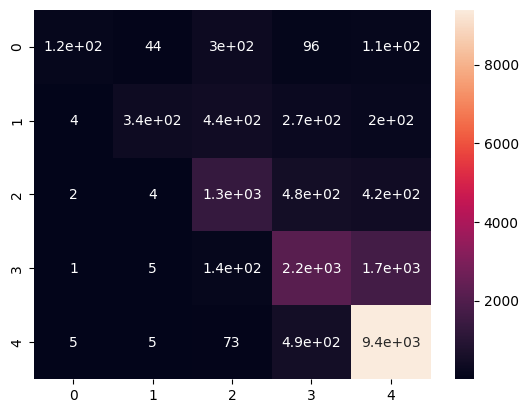

In [63]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm,annot=True)

<Axes: >

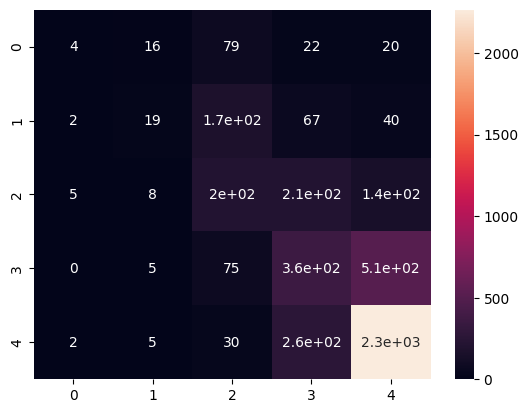

In [64]:
y_predict_test = NB_classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm1,annot=True)

In [65]:
print('Training Classification Report:')
print(classification_report(y_train, y_predict_train))

Training Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.18      0.31       680
           2       0.85      0.27      0.41      1249
           3       0.59      0.60      0.59      2249
           4       0.62      0.55      0.58      3960
           5       0.80      0.94      0.86      9964

    accuracy                           0.74     18102
   macro avg       0.75      0.51      0.55     18102
weighted avg       0.74      0.74      0.72     18102



In [66]:
print('Testing Classification Report:')
print(classification_report(y_test, y_predict_test))

Testing Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.03      0.05       141
           2       0.36      0.06      0.11       300
           3       0.37      0.36      0.36       574
           4       0.39      0.38      0.38       948
           5       0.76      0.88      0.82      2563

    accuracy                           0.63      4526
   macro avg       0.44      0.34      0.34      4526
weighted avg       0.59      0.63      0.60      4526



In [95]:
test_sample = ['good clothing']
test_sample_countv = vectorizer.transform(test_sample)
test_pro = NB_classifier.predict(test_sample_countv)
test_pro

array([5], dtype=int64)